## Read Me  
The code is seperate into 3 parts(Scanner,Parser and others[ex. function printing tree])  
The test case is down at the bottom of the notebook.  
** For best result, view the tree inside texteditor **

In [1]:
from IPython.display import Image

In [67]:
!open test1.rtf

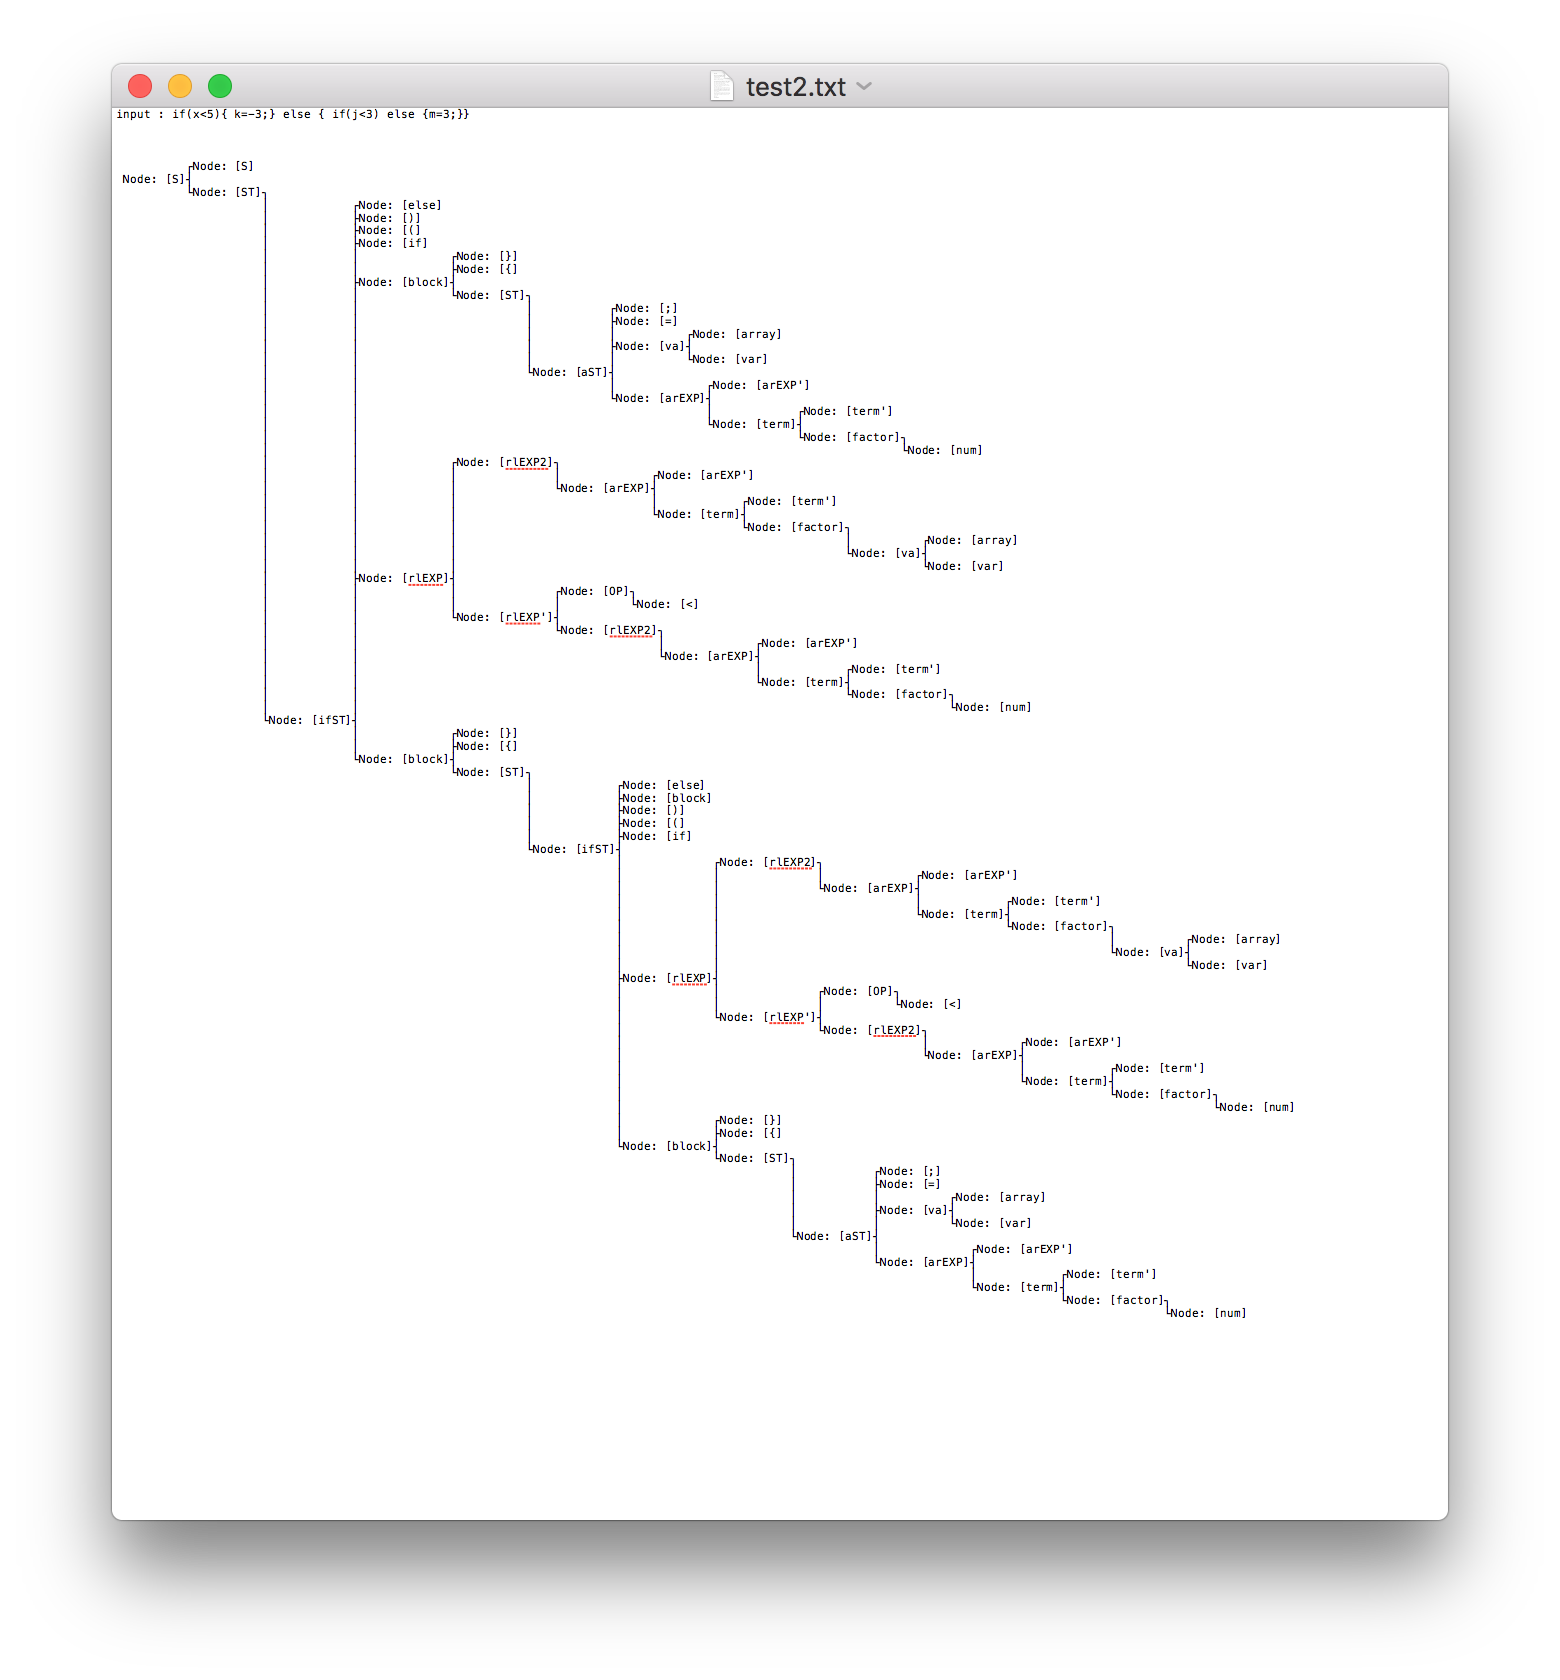

In [55]:
Image("./test2.png")

In [68]:
!open test2.txt

In [72]:
!open test3.txt

In [73]:
!open test4.txt

In [74]:
!open test5.txt

# Node
define Node

In [19]:
class Node(object):
    def __init__(self, id_):
        self.id = id_
        self.children = []
        
    def __repr__(self):
        return "Node: [%s]" % self.id
    
    def add_child(self, node):
        self.children.append(node) 
    
    def get_children(self):
        return self.children         
    
    def get_rev_children(self):
        children = self.children[:]
        children.reverse()
        return children         

In [8]:
a = Node('a')

# Scanner  

In [9]:
### create DFA
## remain from char/digit meet other punc
#state12 = dict({x:99 for x in LetterAndDigit.replace('f','')})
import string
LD = string.ascii_lowercase + string.ascii_uppercase + "0123456789"
digits = "0123456789"
chars = string.ascii_lowercase + string.ascii_uppercase
print(LD)
test = "var = 1"
DFADict = {
    #state 0 with
    (0, ' '): 0,
    (0, 'f'): 1,
    (1, 'o'): 2,
    #Other choice from stage 1 will add by state_f
    (2, 'r'): 3, # return for else ?? choice state_for
    #Other choice from stage 2 will add by state_fo
    (0, 'i'): 4,
    #Other choice from stage 4 will add by state_i
    (4, 'f'): 5, #return if
    (0, 'e'): 6,
    #Other choice from stage 6 will add by state_e
    (6, 'l'): 7,
    #Other choice from stage 7 will add by state_el
    (7, 's'): 8,
    #Other choice from stage 8 will add by state_els
    (8, 'e'): 9, #return else
    (0, '('): 10, #return LPAREN
    (0, ')'): 11, #return RPAREN
    (0, '{'): 12, #return LCURLBRAC
    (0, '}'): 13, #return RCURLBRAC
    (0, '['): 14, #return LBRAC
    (0, ']'): 15, #return RBRAC
    (0, ';'): 16, #return semicolon
    (0, '>'): 17, #return GT
    (0, '<'): 18, #return LT
    (0, '='): 19, #return EQ
    (0, '+'): 20, #return add
    (0, '*'): 21, #return mul
    (0, '-'): 22, #22+[0-9]>>23(loop) return digit
    #return var 
    #0+[a-z,A-Z]>>99+[a-z,A-Z,0-9]>>99(loop)
    #return digit
    #0+[0-9]>>23+[0-9]>>23(loop)
}
print(DFADict)
#Choice state_0 to var
state_0v = dict({(0, x):99 for x in chars})
state_0v.pop((0,'f'), None)
state_0v.pop((0,'i'),None)
state_0v.pop((0,'e'),None)
DFADict.update(state_0v)

#state_99 >> +[a-z,A-Z,0-9]
state_99 = dict({(99, x):99 for x in LD})
DFADict.update(state_99)

#Choice state_0 to digits
state_0d = dict({(0, x):23 for x in digits})
DFADict.update(state_0d)
#Choice state_negative to digits
state_neg = dict({(22, x):23 for x in digits})
DFADict.update(state_neg)
#state_23 >> +[0-9]
state_23 = dict({(23, x):23 for x in digits})
DFADict.update(state_23)

#Choice state_f
state_f = dict({(1, x):99 for x in LD})
state_f.pop((1,'o'), None)
DFADict.update(state_f)
#Choice state_fo
state_fo = dict({(2, x):99 for x in LD})
state_fo.pop((2,'r'), None)
DFADict.update(state_fo)

#Choice state_for to var
state_for = dict({(3, x):99 for x in LD})
DFADict.update(state_for)

#Choice state_i
state_i = dict({(4, x):99 for x in LD})
state_i.pop((4,'f'), None)
#print(state_i)
DFADict.update(state_i)
#DFADict.update((4,'f'), 5)

#Choice state_if to var
state_if = dict({(5, x):99 for x in LD})
DFADict.update(state_if)

#Choice state_e
state_e = dict({(6, x):99 for x in LD})
state_e.pop((6,'l'), None)
DFADict.update(state_e)
#Choice state_el
state_el = dict({(7, x):99 for x in LD})
state_el.pop((7,'s'), None)
DFADict.update(state_el)
#Choice state_els
state_els = dict({(8, x):99 for x in LD})
state_els.pop((8,'e'), None)
DFADict.update(state_els)
#Choice state_else to var
state_else = dict({(9, x):99 for x in LD})
DFADict.update(state_else)


abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789
{(0, ' '): 0, (0, 'f'): 1, (1, 'o'): 2, (2, 'r'): 3, (0, 'i'): 4, (4, 'f'): 5, (0, 'e'): 6, (6, 'l'): 7, (7, 's'): 8, (8, 'e'): 9, (0, '('): 10, (0, ')'): 11, (0, '{'): 12, (0, '}'): 13, (0, '['): 14, (0, ']'): 15, (0, ';'): 16, (0, '>'): 17, (0, '<'): 18, (0, '='): 19, (0, '+'): 20, (0, '*'): 21, (0, '-'): 22}


In [10]:
def scanner(test):
    pointer = 0
    curState = 0
    streamOfToken = [[]]
    numToken = 0
    lookahead = 1
    word = ''
    text = test + '$'
    symbol = ''
    while pointer < len(text) and text[pointer] != '$':
        symbol = text[pointer]
        if symbol == ' ' :
            curState = 0
            pointer = pointer+1
            lookahead = lookahead+1
        elif (curState,symbol) not in DFADict:
            curState = 0
        else:
            nextstate_sym = DFADict[(curState,symbol)]
            curState = nextstate_sym
            pointer = pointer+1
            word = word+symbol
            if (nextstate_sym,text[lookahead]) not in DFADict:
                streamOfToken[numToken].append(word)
                streamOfToken[numToken].append(nextstate_sym)
                if(text[lookahead]!='$'):
                    streamOfToken.append([])
                numToken+=1
                word=''
            lookahead = lookahead+1
    finalStateDict = {3:"for" ,5:"if" ,9:"else" ,10:"(",11:")",12:"{",13:"}",14:"[",15:"]",16:";",17:">",18:"<",19:"=",20:"+",21:"*",23:"num",99:"var"}
    for x in streamOfToken:
        x[1] = finalStateDict[x[1]]
    #preprocess streamOfToken
    in_token = []
    for eachToken in streamOfToken:
        in_token.append(eachToken[1])
    in_token.append('$')
    return(in_token)

# Parsing

In [11]:
stack = []
#set of terminals
T = ["var","[","]","{","}","=",";","if","(",")","else","for","<",">","+","*","num"] 
#set of non-terminals
N = ['S','ST','var','array','const','block','aST','aST2','ifST','forST','rlEXP',"rlEXP'",'rlEXP2','OP','arEXP',"arEXP'",'term',"term'","factor"] 

In [12]:
production = {
    1: {'S':['ST','S']},
    2: {'S':['empty']},
    3: {'ST':['aST']},
    4: {'ST':['ifST']},
    5: {'ST':['forST']},
    6: {'ST':['block']},
    7: {'va':['var','array']},
    8: {'array':['empty']},
    9: {'array':['[','arEXP',']','array']},
    10: {'block':['{','ST','}']},
    11: {'aST':['va','=','arEXP',';']},
    12: {'aST2':['va','=','arEXP']},
    13: {'ifST':['if','(','rlEXP',')','block','else','block']},
    14: {'forST':['for','(','aST2',';','rlEXP',';','aST2',')','block']},
    15: {'rlEXP':['rlEXP2',"rlEXP'"]},
    16: {"rlEXP'":['OP','rlEXP2']},
    17: {"rlEXP'":['empty']},
    18: {'rlEXP2':['(','rlEXP',')']},
    19: {'rlEXP2':['arEXP']},
    20: {'OP':['<']},
    21: {'OP':['>']},
    22: {'arEXP':['term',"arEXP'"]},
    23: {"arEXP'":['+','term',"arEXP'"]},
    24: {"arEXP'":['empty']},
    25: {'term':['factor',"term'"]},
    26: {"term'":['*','factor',"term'"]},
    27: {"term'":['empty']},
    28: {'factor':['(','arEXP',')']},
    29: {'factor':['num']},
    30: {'factor':['va']}
}

In [13]:
ParsingTable = {
    'S':{
        'var':1,
        '{':1,
        'if':1,
        'for':1,
        '$':2
    },
    'ST':{
        'var':3,
        '{':6,
        'if':4,
        'for':5
    },
    'va':{
        'var':7   
    },
    'array':{
        '[':9,
        ']':8,
        '=':8,
        ';':8,
        ')':8,
        '<':8,
        '>':8,
        '+':8,
        '*':8
    },
    'block':{
        '{':10
    },
    'aST':{
        'var':11
    },
    'aST2':{
        'var':12
    },
    'ifST':{
        'if':13
    },
    'forST':{
        'for':14
    },
    'rlEXP':{
        'var':15,
        '(':15,
        'num':15
    },
    "rlEXP'":{
        ';':17,
        ')':17,
        '<':16,
        '>':16
    },
    'rlEXP2':{
        'var':19,
        '(':19,
        'num':19
    },
    'OP':{
        '<':20,
        '>':21
    },
    'arEXP':{
        'var':22,
        '(':22,
        'num':22
    },
    "arEXP'":{
        ']':24,
        ';':24,
        ')':24,
        '<':24,
        '>':24,
        '+':23,
    },
    'term':{
        'var':25,
        '(':25,
        'num':25
    },
    "term'":{
        ']':27,
        ';':27,
        ')':27,
        '<':27,
        '>':27,
        '+':27,
        '*':26
    },
    "factor":{
        'var':30,
        '(':28,
        'num':29
    }
}

In [44]:
def parsing(in_token):
    stack= []
    startNode = Node('S')
    stackTree = []
    stackTree.append(Node('$'))
    stackTree.append(startNode)
    root = startNode
    stack.append('$')
    stack.append('S')
    current = 0
    while len(stack) > 0 and len(in_token) > 0:
        x = stack.pop()
        tempParentNode = stackTree.pop()
        a = in_token[current]
        print("x:",x,"a:",a)
        #print("parent: ",tempParentNode)
        if a=='$' and x=='$':
            print('ACCEPT')
            break
        elif T.count(x)>0 or x=='$':
            if x==a:
                current = current + 1
            else:
                raise Exception('Abort')
        else: # x is non-terminal
            try:
                #print("production:",production[ParsingTable[x][a]])
                tempToPush = list(production[ParsingTable[x][a]].values())[0]
            except:
                print('Abort')
            tempToken = reversed(tempToPush)
            for token in tempToken:
                if token != 'empty':
                    stack.append(token)
                    nodeBeingPush = Node(token)
                    tempParentNode.add_child(nodeBeingPush) 
                    stackTree.append(nodeBeingPush)
            """for token in tempToPush:
                nodeBeingPush = Node(token)
                tempParentNode.add_child(nodeBeingPush) 
                stackTree.append(nodeBeingPush)"""

        print("stack",stack)
        #print("stackTree",stackTree)
        #print(current)
        #print('--//--')
    return (root, stack , stackTree)


# Others

In [15]:
def print_tree2(current_node, f, childattr='children', nameattr='name', indent='', last='updown'):
    

    if hasattr(current_node, nameattr):
        name = lambda node: getattr(node, nameattr)
    else:
        name = lambda node: str(node)

    children = lambda node: getattr(node, childattr)
    nb_children = lambda node: sum(nb_children(child) for child in children(node)) + 1
    size_branch = {child: nb_children(child) for child in children(current_node)}

    """ Creation of balanced lists for "up" branch and "down" branch. """
    up = sorted(children(current_node), key=lambda node: nb_children(node))
    down = []
    while up and sum(size_branch[node] for node in down) < sum(size_branch[node] for node in up):
        down.append(up.pop())

    """ Printing of "up" branch. """
    for child in up:     
        next_last = 'up' if up.index(child) is 0 else ''
        next_indent = '{0}{1}{2}'.format(indent, ' ' if 'up' in last else '│', ' ' * len(name(current_node)))
        print_tree2(child, f, childattr, nameattr, next_indent, next_last)

    """ Printing of current node. """
    if last == 'up': start_shape = '┌'
    elif last == 'down': start_shape = '└'
    elif last == 'updown': start_shape = ' '
    else: start_shape = '├'

    if up: end_shape = '┤'
    elif down: end_shape = '┐'
    else: end_shape = ''

    f.write('{0}{1}{2}{3}\n'.format(indent, start_shape, name(current_node), end_shape))
    """ Printing of "down" branch. """
    for child in down:
        next_last = 'down' if down.index(child) is len(down) - 1 else ''
        next_indent = '{0}{1}{2}'.format(indent, ' ' if 'down' in last else '│', ' ' * len(name(current_node)))
        print_tree2(child, f, childattr, nameattr, next_indent, next_last)
    

In [16]:
from pptree import *

# TEST

```TEST CASE 
    1: forex=a[2][3]+b[5]*g+xyz*arr[1][2][3][4][5];
    2: if(x<5){ k=-3;} else { if(j<3) else {m=3;}}
    3: if(x<5){if(j<3){m=3;}else{k=3;}} else{k=4;}
    4: for(k=3;j<4;k=k+1){if(j<3){k=4;}else{m=5;}}
    5: if(i[2]<i[5]]){ x=x+2;} else {x=y;} if(i[4]>i[5]){gx=-13;} else {gx=gx+1;}
    6: for(for(x=1;x<10;x=x+1){k=3;};x<10;x=x+1){y=y+1;}
```

### 1

In [49]:
t1 = scanner('forex=a[2][3]+b[5]*g+xyz*arr[1][2][3][4][5];')
root1,t1_stack,t1_stackTree = parsing(t1)
f = open("test1.txt","w")
f.write('input : forex=a[2][3]+b[5]*g+xyz*arr[1][2][3][4][5];\n\n\n\n')
print_tree2(root1,f)
f.close()
!open test1.txt

x: S a: var
stack ['$', 'S', 'ST']
x: ST a: var
stack ['$', 'S', 'aST']
x: aST a: var
stack ['$', 'S', ';', 'arEXP', '=', 'va']
x: va a: var
stack ['$', 'S', ';', 'arEXP', '=', 'array', 'var']
x: var a: var
stack ['$', 'S', ';', 'arEXP', '=', 'array']
x: array a: =
stack ['$', 'S', ';', 'arEXP', '=']
x: = a: =
stack ['$', 'S', ';', 'arEXP']
x: arEXP a: var
stack ['$', 'S', ';', "arEXP'", 'term']
x: term a: var
stack ['$', 'S', ';', "arEXP'", "term'", 'factor']
x: factor a: var
stack ['$', 'S', ';', "arEXP'", "term'", 'va']
x: va a: var
stack ['$', 'S', ';', "arEXP'", "term'", 'array', 'var']
x: var a: var
stack ['$', 'S', ';', "arEXP'", "term'", 'array']
x: array a: [
stack ['$', 'S', ';', "arEXP'", "term'", 'array', ']', 'arEXP', '[']
x: [ a: [
stack ['$', 'S', ';', "arEXP'", "term'", 'array', ']', 'arEXP']
x: arEXP a: num
stack ['$', 'S', ';', "arEXP'", "term'", 'array', ']', "arEXP'", 'term']
x: term a: num
stack ['$', 'S', ';', "arEXP'", "term'", 'array', ']', "arEXP'", "term'", 'f

In [50]:
print_tree(root1)

          ┌Node: [S]
 Node: [S]┤
          └Node: [ST]┐
                     │           ┌Node: [;]
                     │           ├Node: [=]
                     │           │          ┌Node: [array]
                     │           ├Node: [va]┤
                     │           │          └Node: [var]
                     └Node: [aST]┤
                                 │                          ┌Node: [term']
                                 │             ┌Node: [term]┤
                                 │             │            └Node: [factor]┐
                                 │             │                           │          ┌Node: [var]
                                 │             │                           └Node: [va]┤
                                 │             │                                      │             ┌Node: []]
                                 │             │                                      │             ├Node: [[]
                                 │  

### 2

In [71]:
t2 = scanner('if(x<5){ k=-3;} else { if(j<3) {k=4;} else {m=3;}}')
root2,t2_stack,t2_stackTree = parsing(t2)
f = open("test2.txt","w")
f.write('input : if(x<5){ k=-3;} else { if(j<3) {k=4;} else {m=3;}}\n\n\n\n')
print_tree2(root2,f)
f.close()
!open test2.txt

x: S a: if
stack ['$', 'S', 'ST']
x: ST a: if
stack ['$', 'S', 'ifST']
x: ifST a: if
stack ['$', 'S', 'block', 'else', 'block', ')', 'rlEXP', '(', 'if']
x: if a: if
stack ['$', 'S', 'block', 'else', 'block', ')', 'rlEXP', '(']
x: ( a: (
stack ['$', 'S', 'block', 'else', 'block', ')', 'rlEXP']
x: rlEXP a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", 'rlEXP2']
x: rlEXP2 a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", 'arEXP']
x: arEXP a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", "arEXP'", 'term']
x: term a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", "arEXP'", "term'", 'factor']
x: factor a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", "arEXP'", "term'", 'va']
x: va a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", "arEXP'", "term'", 'array', 'var']
x: var a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", "arEXP'", "term'", 'array']
x: array a: <
stack ['$', 'S', 'block'

### 3

In [58]:
t3 = scanner('if(x<5){if(j<3){m=3;}else{k=3;}} else{k=4;}')
root3,t3_stack,t3_stackTree = parsing(t3)
f = open("test3.txt","w")
f.write('input : if(x<5){if(j<3){m=3;}else{k=3;}} else{k=4;}\n\n\n\n')
print_tree2(root3,f)
f.close()
!open test3.txt

x: S a: if
stack ['$', 'S', 'ST']
x: ST a: if
stack ['$', 'S', 'ifST']
x: ifST a: if
stack ['$', 'S', 'block', 'else', 'block', ')', 'rlEXP', '(', 'if']
x: if a: if
stack ['$', 'S', 'block', 'else', 'block', ')', 'rlEXP', '(']
x: ( a: (
stack ['$', 'S', 'block', 'else', 'block', ')', 'rlEXP']
x: rlEXP a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", 'rlEXP2']
x: rlEXP2 a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", 'arEXP']
x: arEXP a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", "arEXP'", 'term']
x: term a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", "arEXP'", "term'", 'factor']
x: factor a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", "arEXP'", "term'", 'va']
x: va a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", "arEXP'", "term'", 'array', 'var']
x: var a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", "arEXP'", "term'", 'array']
x: array a: <
stack ['$', 'S', 'block'

### 4

In [61]:
t4 = scanner('for(k=3;j<4;k=k+1){if(j<3){k=4;}else{m=5;}}')
root4,t4_stack,t4_stackTree = parsing(t4)
f = open("test4.txt","w")
f.write('input : for(k=3;j<4;k=k+1){if(j<3){k=4;}else{m=5;}}\n\n\n\n')
print_tree2(root4,f)
f.close()
!open test4.txt

x: S a: for
stack ['$', 'S', 'ST']
x: ST a: for
stack ['$', 'S', 'forST']
x: forST a: for
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'aST2', '(', 'for']
x: for a: for
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'aST2', '(']
x: ( a: (
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'aST2']
x: aST2 a: var
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'arEXP', '=', 'va']
x: va a: var
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'arEXP', '=', 'array', 'var']
x: var a: var
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'arEXP', '=', 'array']
x: array a: =
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'arEXP', '=']
x: = a: =
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'arEXP']
x: arEXP a: num
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', "arEXP'", 'term']
x: term a: num
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', "arEXP'", "term'", 'factor']
x: factor a: num
stack ['

### 5

In [62]:
t5 = scanner('for(for(x=1;x<10;x=x+1){k=3;};x<10;x=x+1){y=y+1;}')
root5,t5_stack,t5_stackTree = parsing(t5)
f = open("test5.txt","w")
f.write('input : for(for(x=1;x<10;x=x+1){k=3;};x<10;x=x+1){y=y+1;}\n\n\n\n')
print_tree2(root5,f)
f.close()
!open test5.txt

x: S a: for
stack ['$', 'S', 'ST']
x: ST a: for
stack ['$', 'S', 'forST']
x: forST a: for
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'aST2', '(', 'for']
x: for a: for
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'aST2', '(']
x: ( a: (
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'aST2']
x: aST2 a: for
Abort
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'aST2', '(', 'for']
x: for a: for
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'aST2', '(']
x: ( a: (
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'aST2']
x: aST2 a: var
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'arEXP', '=', 'va']
x: va a: var
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'arEXP', '=', 'array', 'var']
x: var a: va

In [75]:
t6 = scanner('if(x<5){k=4;}else{k=5;}if(x<7){k=5;}else{k=6;}')
root6,t6_stack,t6_stackTree = parsing(t6)
f = open("test6.txt","w")
f.write('input : if(x<5){k=4;}else{k=5;}if(x<7){k=5;}else{k=6;}\n\n\n\n')
print_tree2(root6,f)
f.close()
!open test6.txt

x: S a: if
stack ['$', 'S', 'ST']
x: ST a: if
stack ['$', 'S', 'ifST']
x: ifST a: if
stack ['$', 'S', 'block', 'else', 'block', ')', 'rlEXP', '(', 'if']
x: if a: if
stack ['$', 'S', 'block', 'else', 'block', ')', 'rlEXP', '(']
x: ( a: (
stack ['$', 'S', 'block', 'else', 'block', ')', 'rlEXP']
x: rlEXP a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", 'rlEXP2']
x: rlEXP2 a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", 'arEXP']
x: arEXP a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", "arEXP'", 'term']
x: term a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", "arEXP'", "term'", 'factor']
x: factor a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", "arEXP'", "term'", 'va']
x: va a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", "arEXP'", "term'", 'array', 'var']
x: var a: var
stack ['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", "arEXP'", "term'", 'array']
x: array a: <
stack ['$', 'S', 'block'

In [76]:
t7 = scanner("for(x=1;x<10;x=x+1) {x=x+1;} for(y=1;y<10;y=y+2) {y=y+1;}")
root7,t7_stack,t7_stackTree = parsing(t7)
f = open("test7.txt","w")
f.write('input : for(x=1;x<10;x=x+1) {x=x+1;} for(y=1;y<10;y=y+2) {y=y+1;}\n\n\n\n')
print_tree2(root7,f)
f.close()
!open test7.txt

x: S a: for
stack ['$', 'S', 'ST']
x: ST a: for
stack ['$', 'S', 'forST']
x: forST a: for
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'aST2', '(', 'for']
x: for a: for
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'aST2', '(']
x: ( a: (
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'aST2']
x: aST2 a: var
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'arEXP', '=', 'va']
x: va a: var
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'arEXP', '=', 'array', 'var']
x: var a: var
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'arEXP', '=', 'array']
x: array a: =
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'arEXP', '=']
x: = a: =
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', 'arEXP']
x: arEXP a: num
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', "arEXP'", 'term']
x: term a: num
stack ['$', 'S', 'block', ')', 'aST2', ';', 'rlEXP', ';', "arEXP'", "term'", 'factor']
x: factor a: num
stack ['